In [ ]:
# exit()

## Data & Library Setup

In [ ]:
# Packages Library

import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import warnings
import sklearn
warnings.filterwarnings('ignore')
from datetime import datetime as dt
import regex as re

In [ ]:
# Plot Setup

from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 10)
rcParams['axes.spines.right'] = True
rcParams['axes.spines.top'] = True
rcParams['axes.spines.bottom'] = True
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
# Table Display Setup: Show All Columns

pd.set_option('display.max_columns', None)

## Data

In [ ]:
raw_data = pd.read_excel('/content/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx')

In [ ]:
raw_data.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [ ]:
df = raw_data.copy()

# Features Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [ ]:
features = list(df.columns)

## StatusResign

In [ ]:
df['AlasanResign'].value_counts()

,count
AlasanResign,
masih_bekerja,132
jam_kerja,16
ganti_karir,14
tidak_bisa_remote,11
kejelasan_karir,11
toxic_culture,10
leadership,9
tidak_bahagia,8
internal_conflict,4


In [ ]:
df['StatusResign'] = df['AlasanResign'].apply(lambda x: 0 if x == 'masih_bekerja' or pd.isna(x) else 1)

In [ ]:
df['StatusResign'].value_counts()

,count
StatusResign,
0,198
1,89


In [ ]:
df['StatusResign'].value_counts(normalize=True)

,proportion
StatusResign,
0,0.689895
1,0.310105


## To DateTime

In [ ]:
date_cols = features[-4:]
date_cols

['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign']

In [ ]:
df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')

## Usia

In [ ]:
current_year = int(df['TanggalResign'].dt.year.max())
current_year

2020

In [ ]:
df['Usia'] = current_year - df['TanggalLahir'].dt.year
df['Usia']

,Usia
0,48
1,36
2,46
3,41
4,46
...,...
282,47
283,46
284,51
285,39


## PernahBekerja

In [ ]:
df['PernahBekerja'].value_counts()

,count
PernahBekerja,
1,286
yes,1


In [ ]:
df['PernahBekerja'] = df['PernahBekerja'].replace('yes', 1)

## LamaBekerja

In [ ]:
df['LamaBekerja'] = df['TanggalResign'] - df['TanggalHiring']
df['LamaBekerja'] = df['LamaBekerja'].dt.days
df['LamaBekerja']

,LamaBekerja
0,NaN
1,1622.0
2,1353.0
3,NaN
4,1760.0
...,...
282,NaN
283,1647.0
284,1670.0
285,2512.0


## DomainEmail

In [ ]:
df['DomainEmail'] = df['Email'].apply(lambda x: x.split('@')[1])
df['DomainEmail']

,DomainEmail
0,yahoo.com
1,yahoo.com
2,icloud.com
3,hotmail.com
4,gmail.com
...,...
282,icloud.com
283,yahoo.com
284,yahoo.com
285,yahoo.com


# Complete Data

In [ ]:
complete_df = df.copy()

In [ ]:
complete_df.to_excel('complete_df.xlsx', index=False)

# EDA

## Features Grouping

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [ ]:
identifier_cols = ['Username', 'EnterpriseID', 'NomorHP', 'Email', 'DomainEmail']
date_cols = ['TanggalLahir', 'TanggalHiring', 'TanggalResign', 'TanggalPenilaianKaryawan']
high_miss_rate = ['IkutProgramLOP']
target_linkage = ['LamaBekerja', 'AlasanResign']

constant_cols = []

for col in df.columns:
  if df[col].nunique() == 1:
    constant_cols.append(col)

binary_cols = []

for col in df.columns:
  if df[col].nunique() == 2 and col not in constant_cols + identifier_cols+ date_cols + high_miss_rate + target_linkage:
    binary_cols.append(col)

categorical_cols = []

for col in df.columns:
  if df[col].dtype == 'object' and col not in constant_cols + identifier_cols + date_cols + high_miss_rate + target_linkage:
    categorical_cols.append(col)

numerical_cols = []

for col in df.columns:
  if col not in constant_cols + identifier_cols+ date_cols + binary_cols + categorical_cols + high_miss_rate + target_linkage:
    numerical_cols.append(col)

In [ ]:
print(f'Identifier Columns: {identifier_cols}')
print(f'Date Columns: {date_cols}')
print(f'Constant Columns: {constant_cols}')
print(f'Binary Columns: {binary_cols}')
print(f'Categorical Columns: {categorical_cols}')
print(f'Numerical Columns: {numerical_cols}')

Identifier Columns: ['Username', 'EnterpriseID', 'NomorHP', 'Email', 'DomainEmail']
Date Columns: ['TanggalLahir', 'TanggalHiring', 'TanggalResign', 'TanggalPenilaianKaryawan']
Constant Columns: ['PernahBekerja']
Binary Columns: ['JenisKelamin', 'StatusResign']
Categorical Columns: ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan']
Numerical Columns: ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'Usia']


In [ ]:
df['StatusKepegawaian'].value_counts()

,count
StatusKepegawaian,
FullTime,217
Outsource,66
Internship,4


In [ ]:
categorical_cols

['StatusPernikahan',
 'JenisKelamin',
 'StatusKepegawaian',
 'Pekerjaan',
 'JenjangKarir',
 'PerformancePegawai',
 'AsalDaerah',
 'HiringPlatform',
 'TingkatPendidikan']

In [ ]:
numerical_cols

['SkorSurveyEngagement',
 'SkorKepuasanPegawai',
 'JumlahKeikutsertaanProjek',
 'JumlahKeterlambatanSebulanTerakhir',
 'JumlahKetidakhadiran',
 'Usia']

In [ ]:
constant_cols

['PernahBekerja']

In [ ]:
binary_cols

['JenisKelamin', 'StatusResign']

## Numeric Features

### Descriptive Statistics

In [ ]:
df[numerical_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SkorSurveyEngagement,287.0,3.101045,0.836388,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,282.0,3.904255,0.913355,1.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,284.0,1.179577,2.294441,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,286.0,0.412587,1.275016,0.0,0.0,0.0,0.0,6.0
JumlahKetidakhadiran,281.0,10.448399,6.902252,1.0,5.0,10.0,15.0,55.0
Usia,287.0,41.390244,8.819537,28.0,34.0,40.0,47.0,69.0


In [ ]:
df[df['LamaBekerja'] <= 0]

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,StatusResign,Usia,LamaBekerja,DomainEmail
108,jealousIguana3,111209,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Timur,CareerBuilder,4,4.0,0.0,0.0,10.0,+6283373813xxx,jealousIguana3026@gmail.com,Sarjana,1,0.0,toxic_culture,1976-09-22,2015-03-30,2020-01-21,2014-08-19,1,44,-223.0,gmail.com
178,gutturalRhino1,101345,Bercerai,Pria,FullTime,Software Engineer (Android),Mid_level,Biasa,Jakarta Pusat,Employee_Referral,3,4.0,5.0,0.0,19.0,+6283163515xxx,gutturalRhino1711@yahoo.com,Sarjana,1,NaN,ganti_karir,1984-09-05,2014-12-01,2017-01-16,2014-08-19,1,36,-104.0,yahoo.com
188,giddyCod5,110980,Belum_menikah,Wanita,FullTime,Software Engineer (Android),Freshgraduate_program,Bagus,Jakarta Pusat,Employee_Referral,3,5.0,0.0,0.0,7.0,+6287822509xxx,giddyCod5287@proton.com,Doktor,1,NaN,leadership,1966-03-22,2013-09-30,2020-02-22,2013-05-30,1,54,-123.0,proton.com
207,troubledQuiche5,106480,Menikah,Wanita,FullTime,Software Engineer (Front End),Mid_level,Sangat_bagus,Jakarta Pusat,Indeed,4,3.0,5.0,0.0,17.0,+6285896075xxx,troubledQuiche5924@icloud.com,Sarjana,1,NaN,leadership,1972-11-21,2017-01-07,2020-02-06,2013-05-30,1,48,-1318.0,icloud.com
256,mereEland2,100583,Bercerai,Wanita,FullTime,Software Engineer (Front End),Senior_level,Sangat_bagus,Jakarta Selatan,LinkedIn,2,5.0,8.0,0.0,19.0,+6287819903xxx,mereEland2033@gmail.com,Magister,1,NaN,kejelasan_karir,1952-01-18,2014-11-10,2020-02-12,2014-08-19,1,68,-83.0,gmail.com


### Distribution

In [ ]:
discrete_num_cols = ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek']
continuous_num_cols = []

for col in numerical_cols:
  if col not in discrete_num_cols:
    continuous_num_cols.append(col)

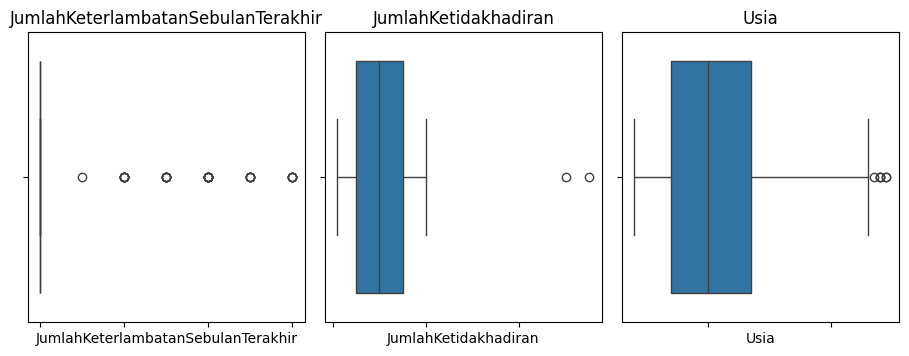

In [ ]:
# Numeric Type Data Distribution through Box Plot
plt.figure(figsize=(15, 10))

for i, column in enumerate(continuous_num_cols, 1):
  plt.subplot(3, 5, i)
  sns.boxplot(x=df[column])
  plt.title(column)
  plt.xticks(visible=False)
  plt.tight_layout()

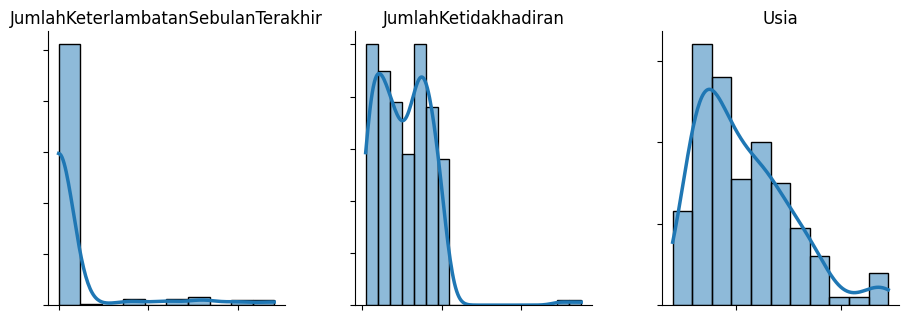

In [ ]:
# Numeric Type Data Distribution through Normality Graph
plt.figure(figsize=(15, 10))

for i, column in enumerate(continuous_num_cols, 1):
  plt.subplot(3, 5, i)
  sns.histplot(x=df[column], kde=True)
  plt.title(column)
  plt.tight_layout()
  plt.xticks(visible=False)
  plt.yticks(visible=False)
  plt.xlabel('')
  plt.ylabel('')
  plt.grid(False)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  # plt.gca().spines['bottom'].set_visible(False)
  # plt.gca().spines['left'].set_visible(False)

plt.show()

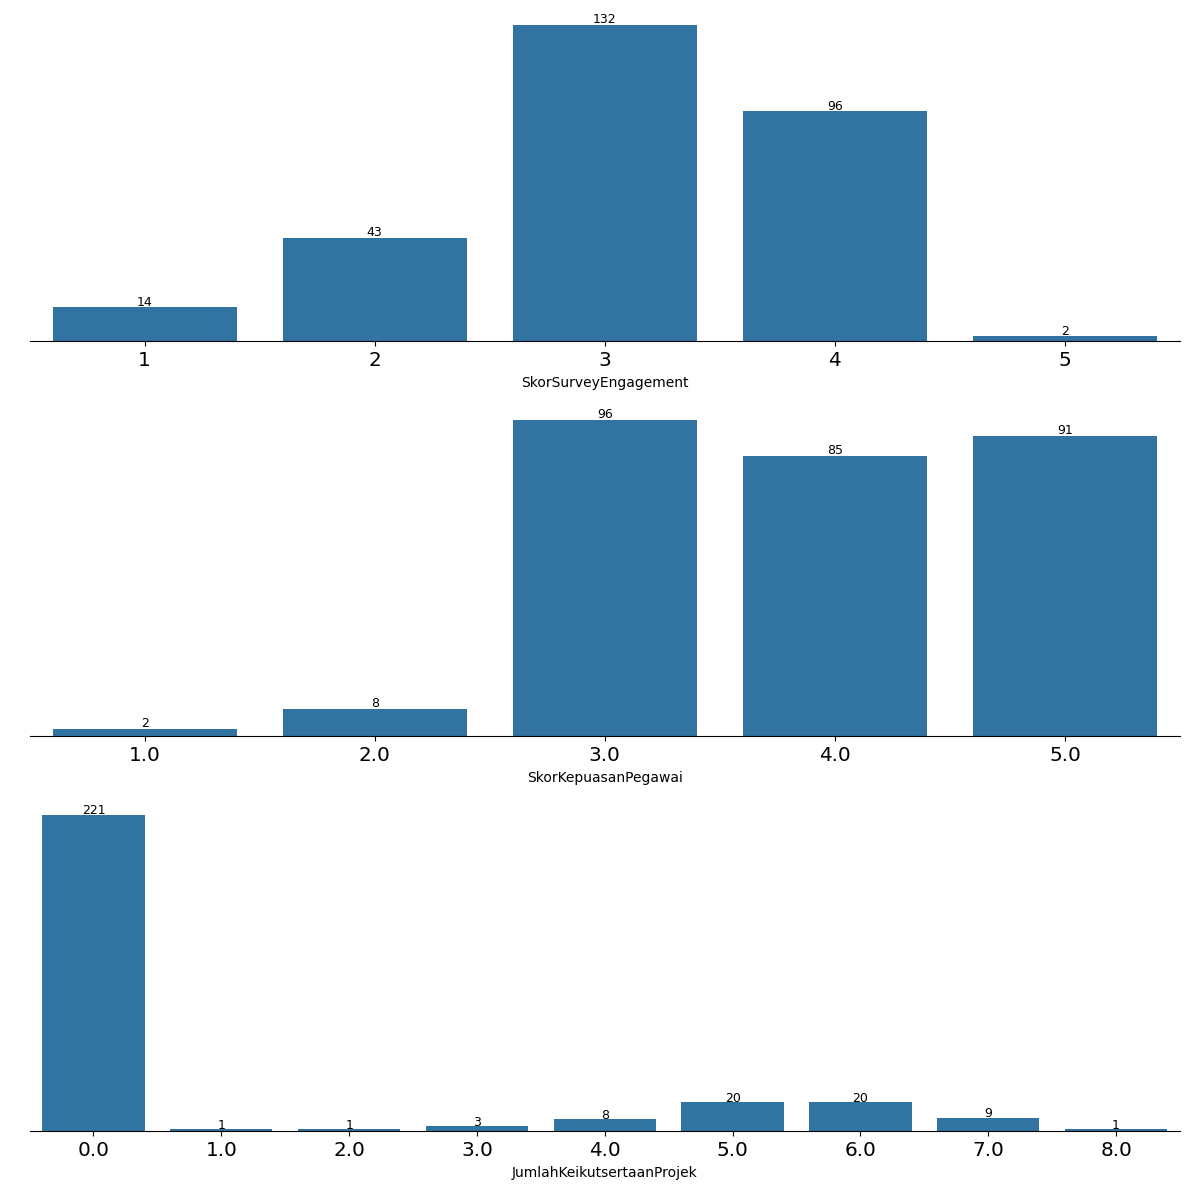

In [ ]:
# countplot
fig, axs = plt.subplots(len(discrete_num_cols), 1, figsize=(12, 12))

for i, feature in enumerate(discrete_num_cols):
	ax = axs[i]
	sns.countplot(data=df, x=feature, ax=ax)
	for p in ax.patches:
		height = int(p.get_height())
		if height > 0:
			ax.text(p.get_x() + p.get_width() / 2., height + 1, str(height),
				ha="center", fontsize=9)

	# ax.set_title(f'{feature} by JobRole with Counts')
	ax.set_ylabel(' ')
	ax.set_xlabel(feature)

	# Hide y-axis ticks and labels (optional)
	ax.tick_params(axis='y', which='both', left=False, labelleft=False)

	# Remove spines
	ax.spines['top'].set_visible(False)
	ax.spines['right'].set_visible(False)
	ax.spines['left'].set_visible(False)

	# ax.legend(title='AgeGroup', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Categoric Features

### Descriptive Statistics

In [ ]:
df[categorical_cols].describe().transpose()

,count,unique,top,freq
StatusPernikahan,287,5,Belum_menikah,132
JenisKelamin,287,2,Wanita,167
StatusKepegawaian,287,3,FullTime,217
Pekerjaan,287,14,Software Engineer (Back End),109
JenjangKarir,287,3,Freshgraduate_program,169
PerformancePegawai,287,5,Biasa,85
AsalDaerah,287,5,Jakarta Pusat,72
HiringPlatform,287,9,Indeed,85
TingkatPendidikan,287,3,Sarjana,176


### Distribution

In [ ]:
high_nunique_cols = []

for col in categorical_cols:
  if df[col].nunique() > 5:
    high_nunique_cols.append(col)

low_nunique_cols = []

for col in categorical_cols:
  if df[col].nunique() <= 5:
    low_nunique_cols.append(col)

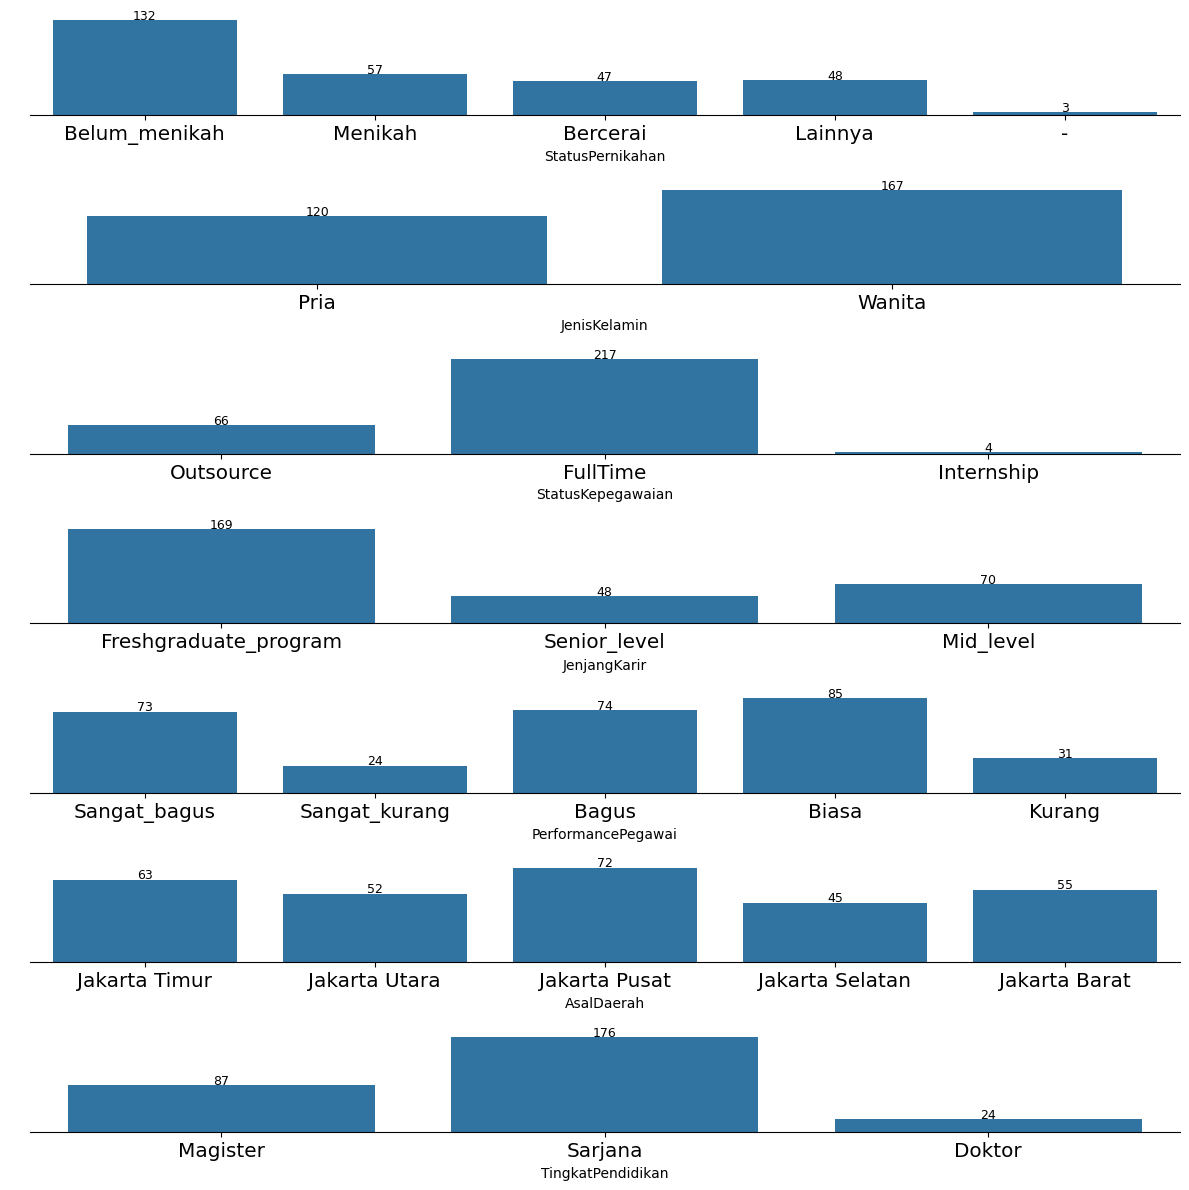

In [ ]:
# countplot
fig, axs = plt.subplots(len(low_nunique_cols), 1, figsize=(12, 12))

for i, feature in enumerate(low_nunique_cols):
	ax = axs[i]
	sns.countplot(data=df, x=feature, ax=ax)
	for p in ax.patches:
		height = int(p.get_height())
		if height > 0:
			ax.text(p.get_x() + p.get_width() / 2., height + 1, str(height),
				ha="center", fontsize=9)

	# ax.set_title(f'{feature} by JobRole with Counts')
	ax.set_ylabel(' ')
	ax.set_xlabel(feature)

	# Hide y-axis ticks and labels (optional)
	ax.tick_params(axis='y', which='both', left=False, labelleft=False)

	# Remove spines
	ax.spines['top'].set_visible(False)
	ax.spines['right'].set_visible(False)
	ax.spines['left'].set_visible(False)

	# ax.legend(title='AgeGroup', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
high_nunique_cols

['Pekerjaan', 'HiringPlatform']

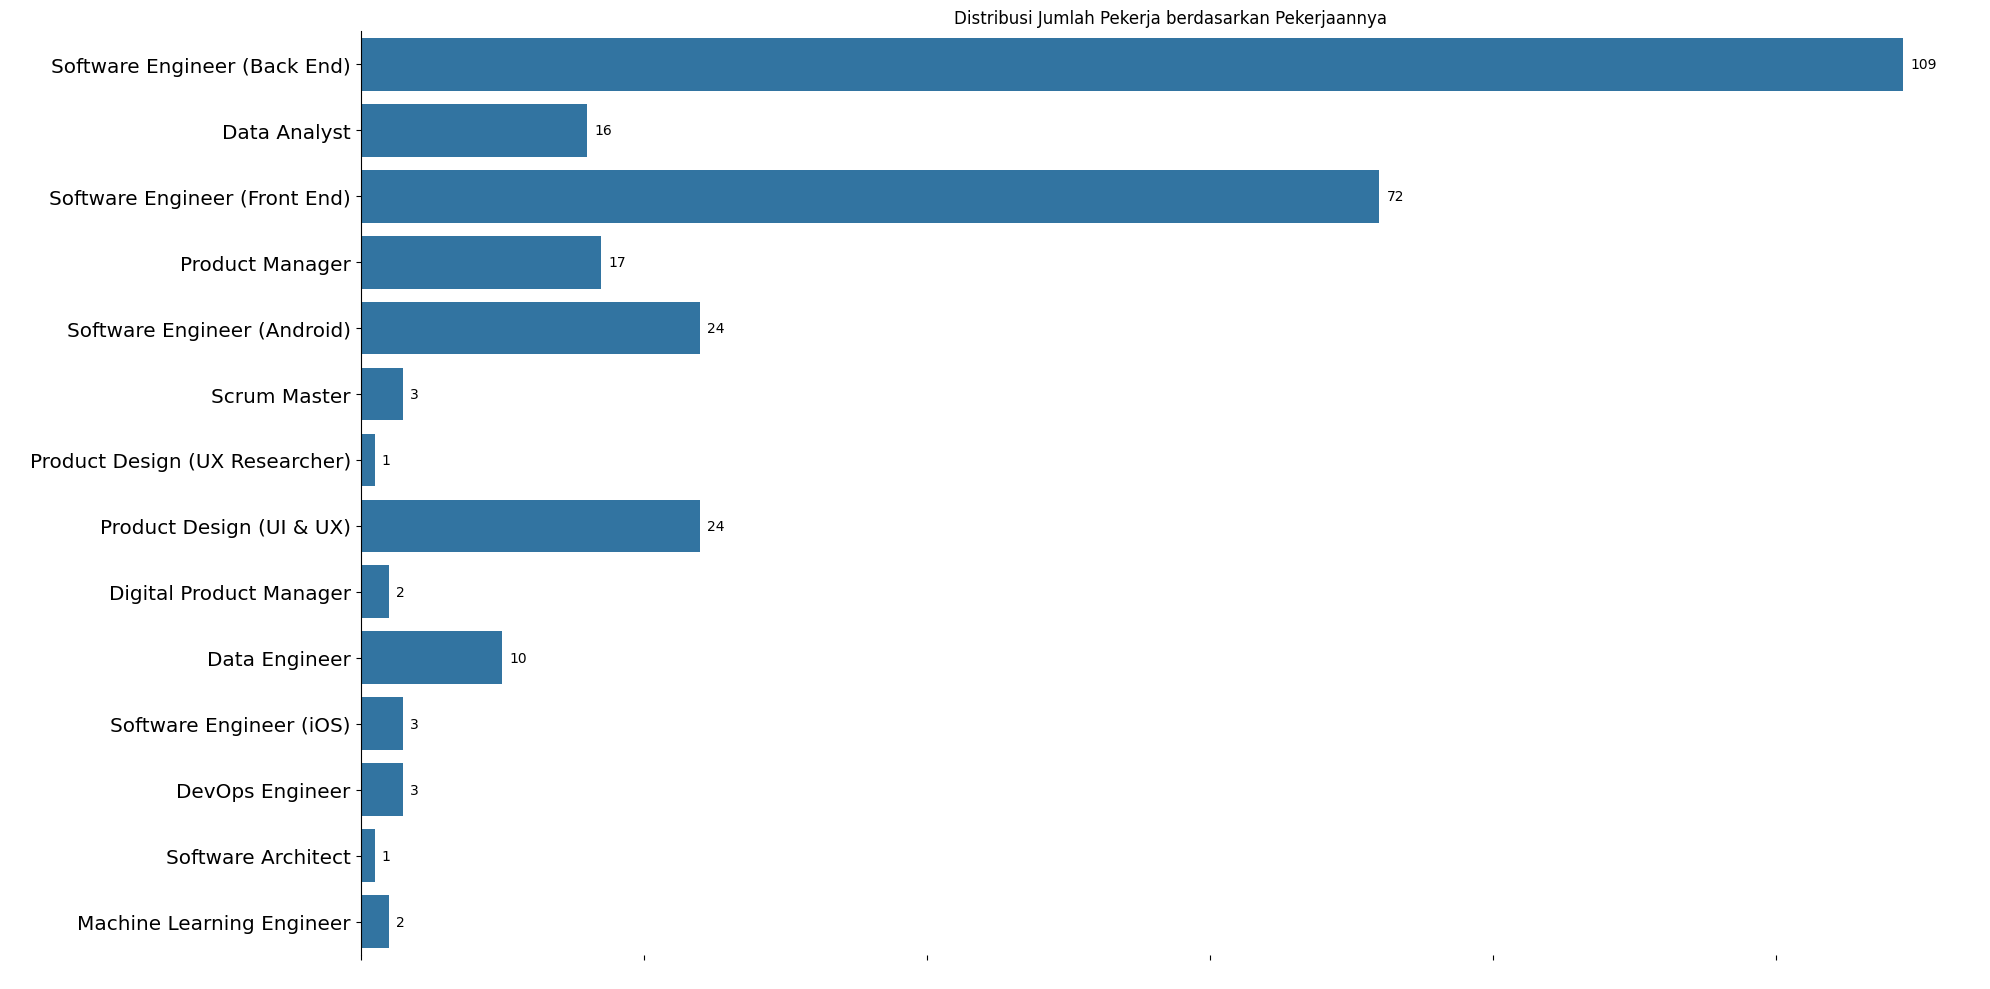

In [ ]:
sns.countplot(y='Pekerjaan', data=df)

plt.title('Distribusi Jumlah Pekerja berdasarkan Pekerjaannya')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(visible=False)
sns.despine(bottom=True)

for i, bar in enumerate(plt.gca().patches):
  width = bar.get_width()
  plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2, int(width), va='center')

plt.tight_layout()
plt.show()

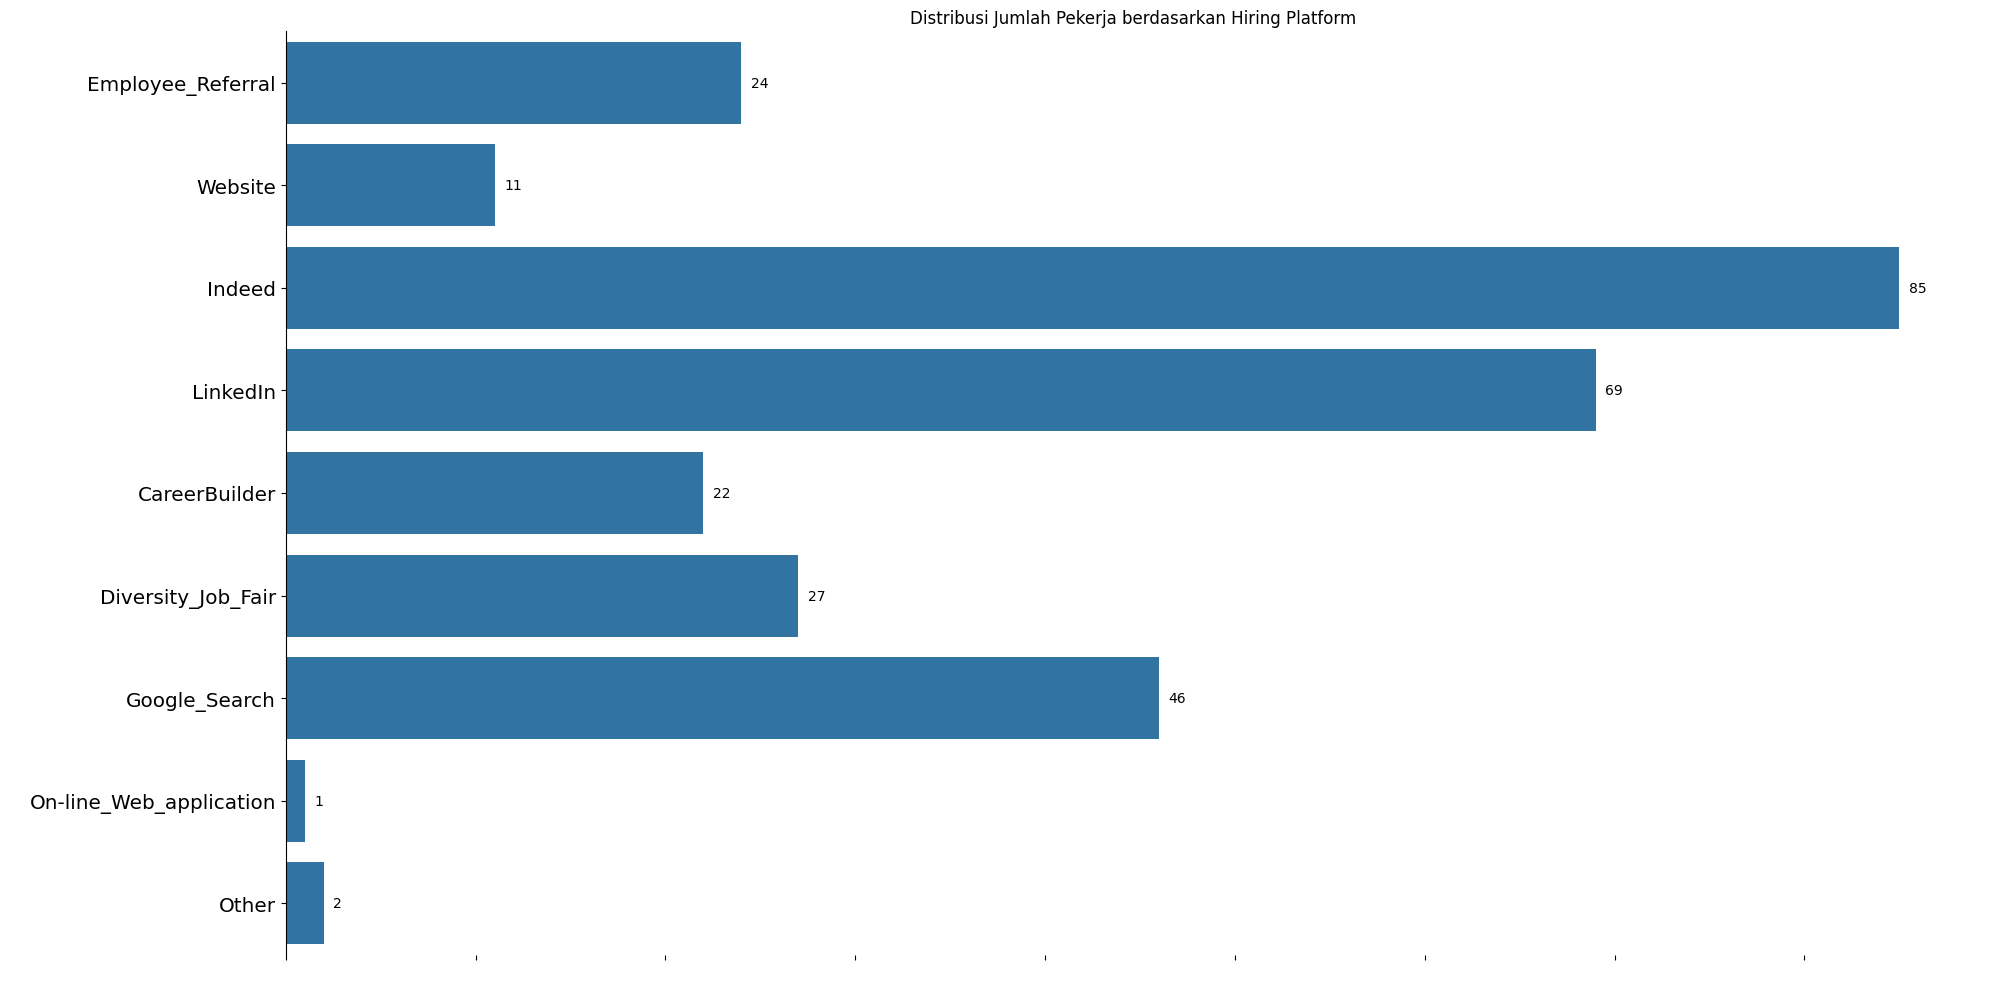

In [ ]:
sns.countplot(y='HiringPlatform', data=df)

plt.title('Distribusi Jumlah Pekerja berdasarkan Hiring Platform')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(visible=False)
sns.despine(bottom=True)

for i, bar in enumerate(plt.gca().patches):
  width = bar.get_width()
  plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2, int(width), va='center')

plt.tight_layout()
plt.show()

In [ ]:
ambigous_cols = ['StatusPernikahan']
unrelated_cols = ['HiringPlatform', 'AsalDaerah']

#### Resigned

In [ ]:
df['StatusResign'].value_counts()

,count
StatusResign,
0,198
1,89


In [ ]:
df_resigned = df[df['StatusResign'] == 1]

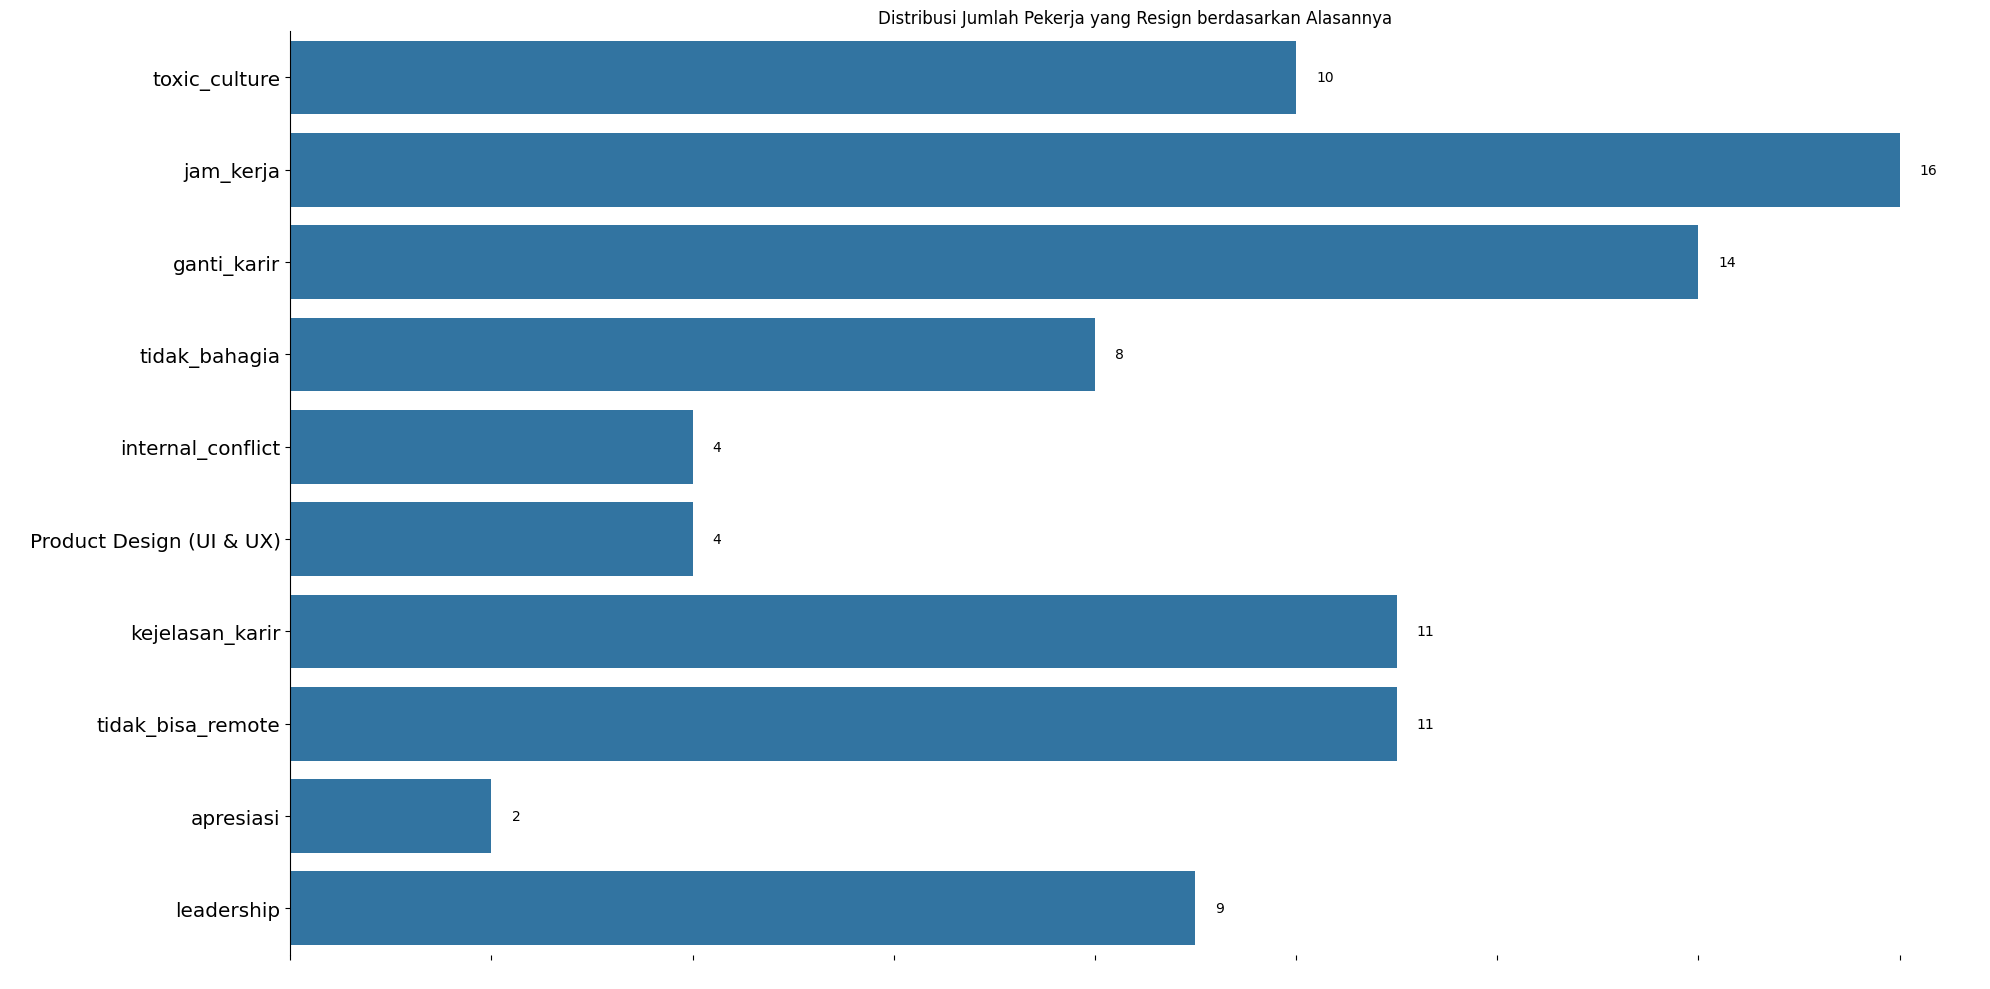

In [ ]:
sns.countplot(y='AlasanResign', data=df_resigned)

plt.title('Distribusi Jumlah Pekerja yang Resign berdasarkan Alasannya')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(visible=False)
sns.despine(bottom=True)

for i, bar in enumerate(plt.gca().patches):
  width = bar.get_width()
  plt.text(width + 0.2, bar.get_y() + bar.get_height() / 2, int(width), va='center')

plt.tight_layout()
plt.show()

## Correlation

In [ ]:
df_num = df[numerical_cols]
# df_num.drop(columns='LamaBekerja', inplace = True)
df_num['StatusResign'] = df['StatusResign']

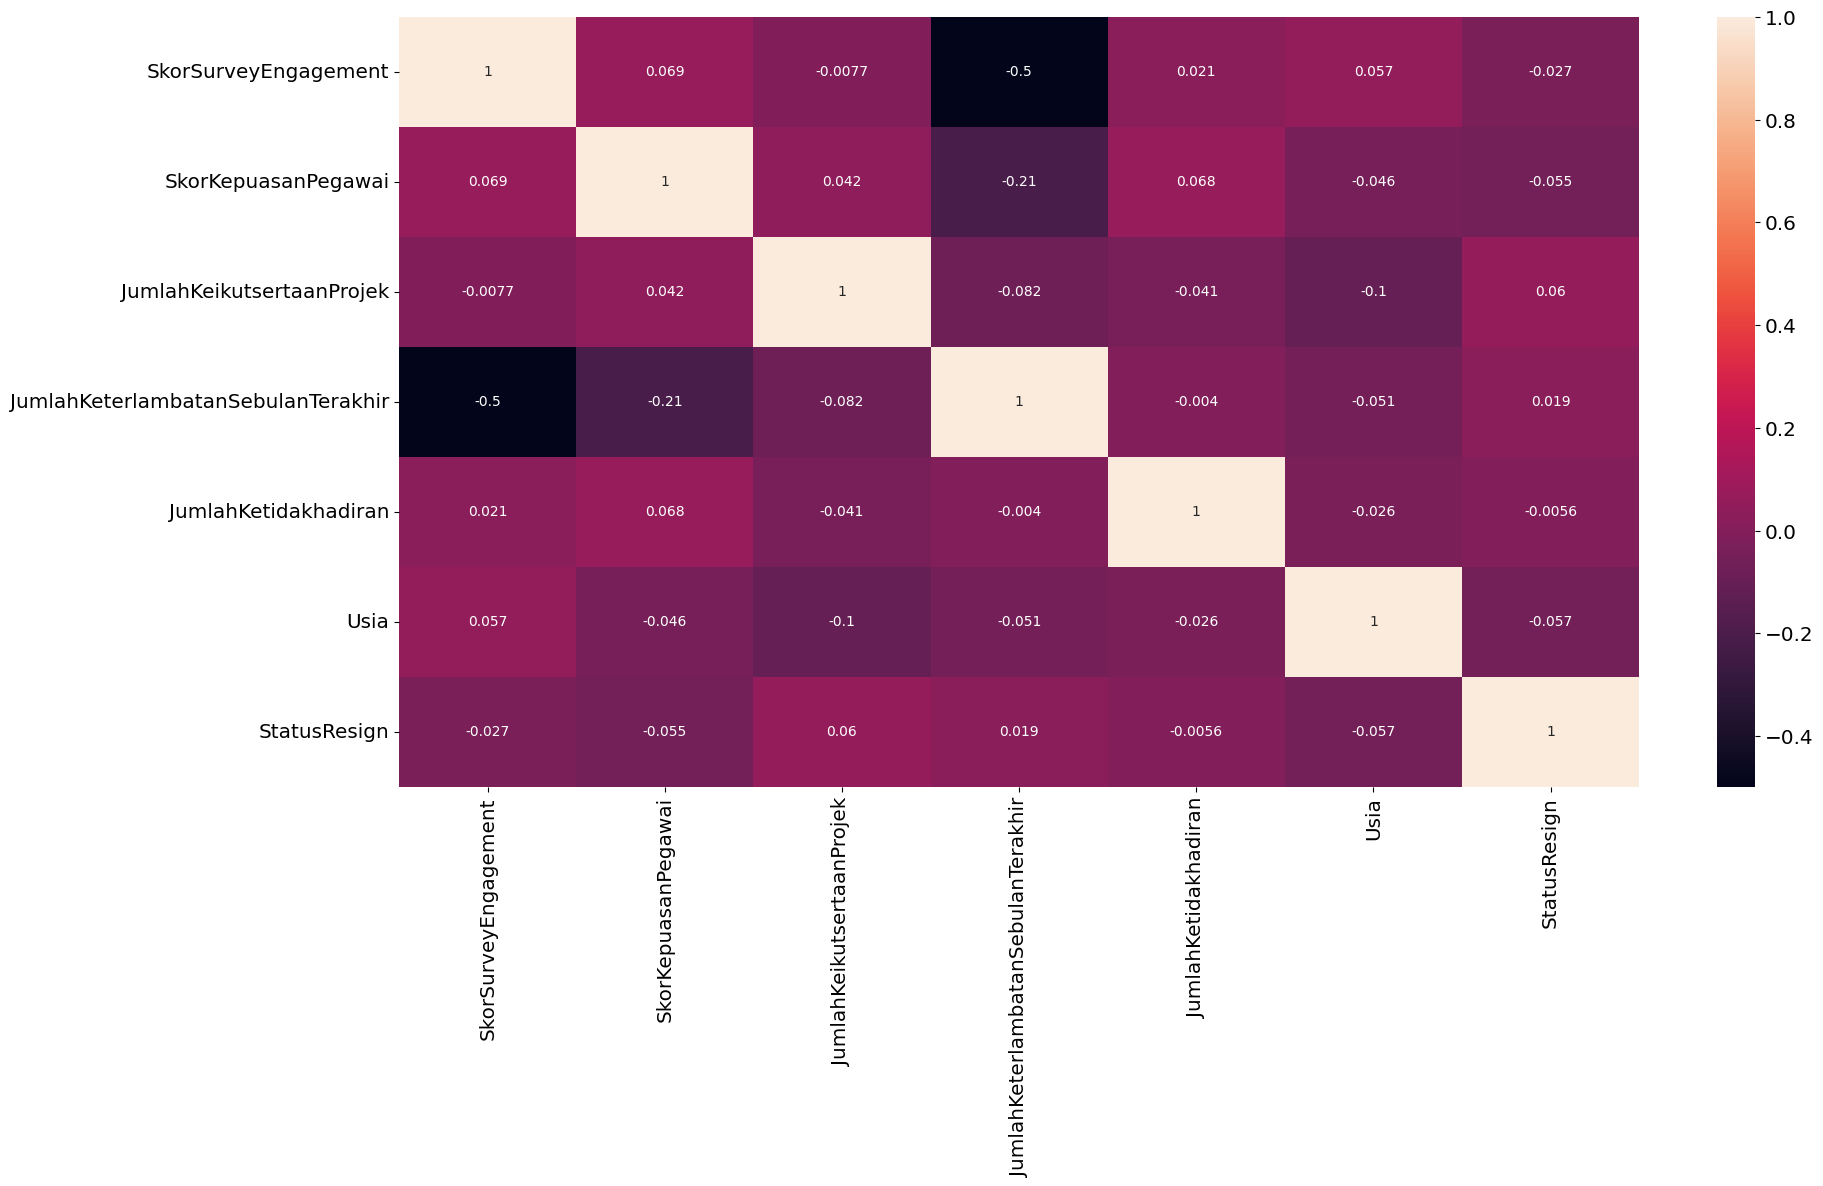

In [ ]:
corr = df_num.corr()
sns.heatmap(corr, annot=True)
plt.show()

## Insights

### Annual Growth of Employees Number

In [ ]:
employee_id = ['Username', 'TanggalHiring', 'TanggalResign', 'LamaBekerja']

In [ ]:
df_employee = complete_df[employee_id]
df_employee

,Username,TanggalHiring,TanggalResign,LamaBekerja
0,spiritedPorpoise3,2011-01-10,NaT,NaN
1,jealousGelding2,2014-01-06,2018-06-16,1622.0
2,pluckyMuesli3,2011-01-10,2014-09-24,1353.0
3,stressedTruffle1,2014-02-17,NaT,NaN
4,shyTermite7,2013-11-11,2018-09-06,1760.0
...,...,...,...,...
282,dopeySheep0,2011-09-26,NaT,NaN
283,yearningPorpoise4,2013-05-13,2017-11-15,1647.0
284,murkySausage9,2013-11-11,2018-06-08,1670.0
285,truthfulMoth4,2011-05-16,2018-04-01,2512.0


In [ ]:
lama_bekerja_min = df_employee[df_employee['LamaBekerja'] < 0]
df_employee = df_employee[(df_employee['LamaBekerja'] >= 0) | (df_employee['TanggalResign'].isnull())]
df_employee.drop(columns='LamaBekerja', inplace= True)
df_employee

,Username,TanggalHiring,TanggalResign
0,spiritedPorpoise3,2011-01-10,NaT
1,jealousGelding2,2014-01-06,2018-06-16
2,pluckyMuesli3,2011-01-10,2014-09-24
3,stressedTruffle1,2014-02-17,NaT
4,shyTermite7,2013-11-11,2018-09-06
...,...,...,...
282,dopeySheep0,2011-09-26,NaT
283,yearningPorpoise4,2013-05-13,2017-11-15
284,murkySausage9,2013-11-11,2018-06-08
285,truthfulMoth4,2011-05-16,2018-04-01


In [ ]:
df_employee_by_year = df_employee.groupby(df_employee['TanggalHiring'].dt.year).count()
df_employee_by_year['PerubahanJumlah'] = df_employee_by_year['TanggalHiring'] - df_employee_by_year['TanggalResign']
df_employee_by_year['AkumulasiJumlahPekerja'] = df_employee_by_year['PerubahanJumlah'].cumsum()
df_employee_by_year

,Username,TanggalHiring,TanggalResign,PerubahanJumlah,AkumulasiJumlahPekerja
TanggalHiring,,,,,
2006,1,1,0,1,1
2007,2,2,1,1,2
2008,2,2,0,2,4
2009,7,7,2,5,9
2010,8,8,3,5,14
2011,76,76,25,51,65
2012,41,41,11,30,95
2013,42,42,14,28,123
2014,54,54,12,42,165


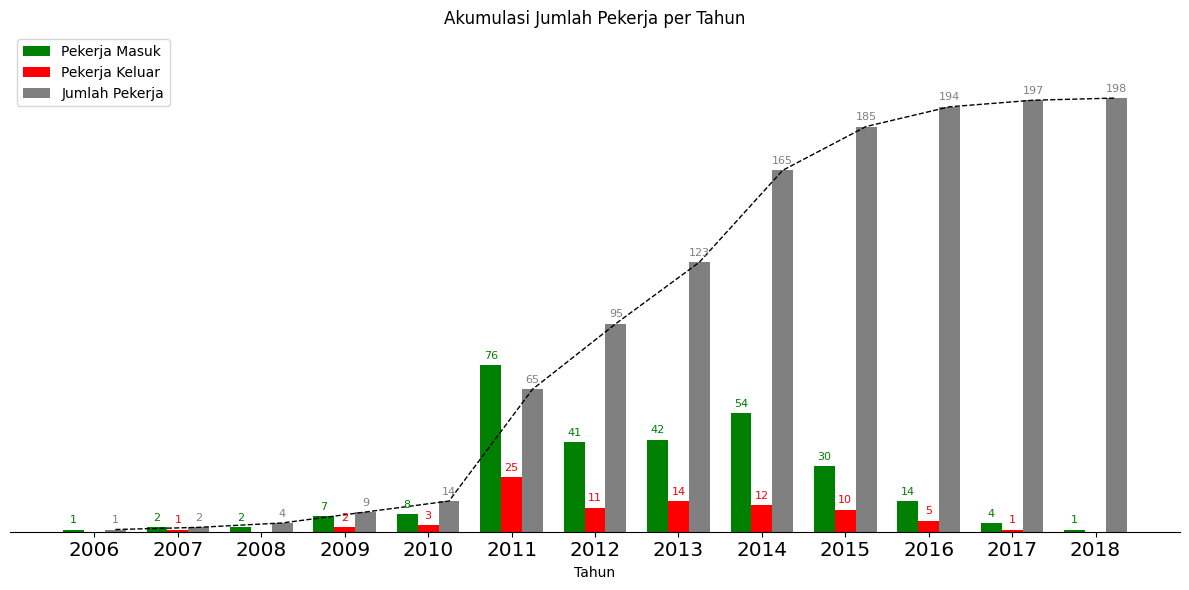

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

# Data
years = df_employee_by_year.index.astype(str)
hiring = df_employee_by_year['TanggalHiring'].values
resign = df_employee_by_year['TanggalResign'].values
total = df_employee_by_year['AkumulasiJumlahPekerja'].values

x = np.arange(len(years))
bar_width = 0.25

# For dashed line positions
grey_bar_x = []
grey_bar_top = []

# Draw bars
for i in range(len(x)):
    year = years[i]
    h = hiring[i]
    r = resign[i]
    t = total[i]
    xi = x[i]

    # --- Green (Hiring) ---
    plt.bar(xi - bar_width, h, width=bar_width, color='green', label='Pekerja Masuk' if i == 0 else "")
    if h > 0:
        plt.text(xi - bar_width, h + 2, str(h), ha='center', va='bottom', fontsize=8, color='green')

    # --- Red (Resigned) ---
    plt.bar(xi, r, width=bar_width, color='red', label='Pekerja Keluar' if i == 0 else "")
    if r > 0:
        plt.text(xi, r + 2, str(r), ha='center', va='bottom', fontsize=8, color='red')

    # --- Gray (Total) ---
    plt.bar(xi + bar_width, t, width=bar_width, color='gray', label='Jumlah Pekerja' if i == 0 else "")
    if t > 0:
        plt.text(xi + bar_width, t + 2, str(t), ha='center', va='bottom', fontsize=8, color='gray')

    # Store gray top position for dashed line
    grey_bar_x.append(xi + bar_width)
    grey_bar_top.append(t)

# Dashed line connecting tops of gray bars
plt.plot(grey_bar_x, grey_bar_top, linestyle='--', color='black', linewidth=1)

# Styling
plt.ylim(0, max(total) + 30)
plt.xticks(x, years)
plt.xlabel('Tahun')
plt.title('Akumulasi Jumlah Pekerja per Tahun')
plt.legend()

# Clean look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.yticks([])
plt.grid(False)
plt.tight_layout()
plt.show()

### Resigned

In [ ]:
df_resigned = complete_df[(complete_df['StatusResign'] == 1) & (complete_df['AlasanResign'] != 'Product Design (UI & UX)')]
df_resigned.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,StatusResign,Usia,LamaBekerja,DomainEmail
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,1,36,1622.0,yahoo.com
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,1,46,1353.0,icloud.com
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2018-09-06,1,46,1760.0,gmail.com
10,puzzledCake4,105548,Belum_menikah,Pria,FullTime,Software Engineer (Front End),Mid_level,Kurang,Jakarta Timur,CareerBuilder,3,2.0,0.0,3.0,3.0,+6281263218xxx,puzzledCake4844@icloud.com,Sarjana,1,1.0,ganti_karir,1975-12-17,2010-07-20,2020-01-14,2019-01-12,1,45,3098.0,icloud.com
11,grizzledSnipe7,111354,Bercerai,Wanita,FullTime,Software Engineer (Back End),Senior_level,Sangat_bagus,Jakarta Barat,CareerBuilder,1,5.0,0.0,5.0,2.0,+6289987666xxx,grizzledSnipe7992@outlook.com,Magister,1,NaN,tidak_bahagia,1989-07-18,2011-07-05,2016-02-06,2018-09-19,1,31,2633.0,outlook.com


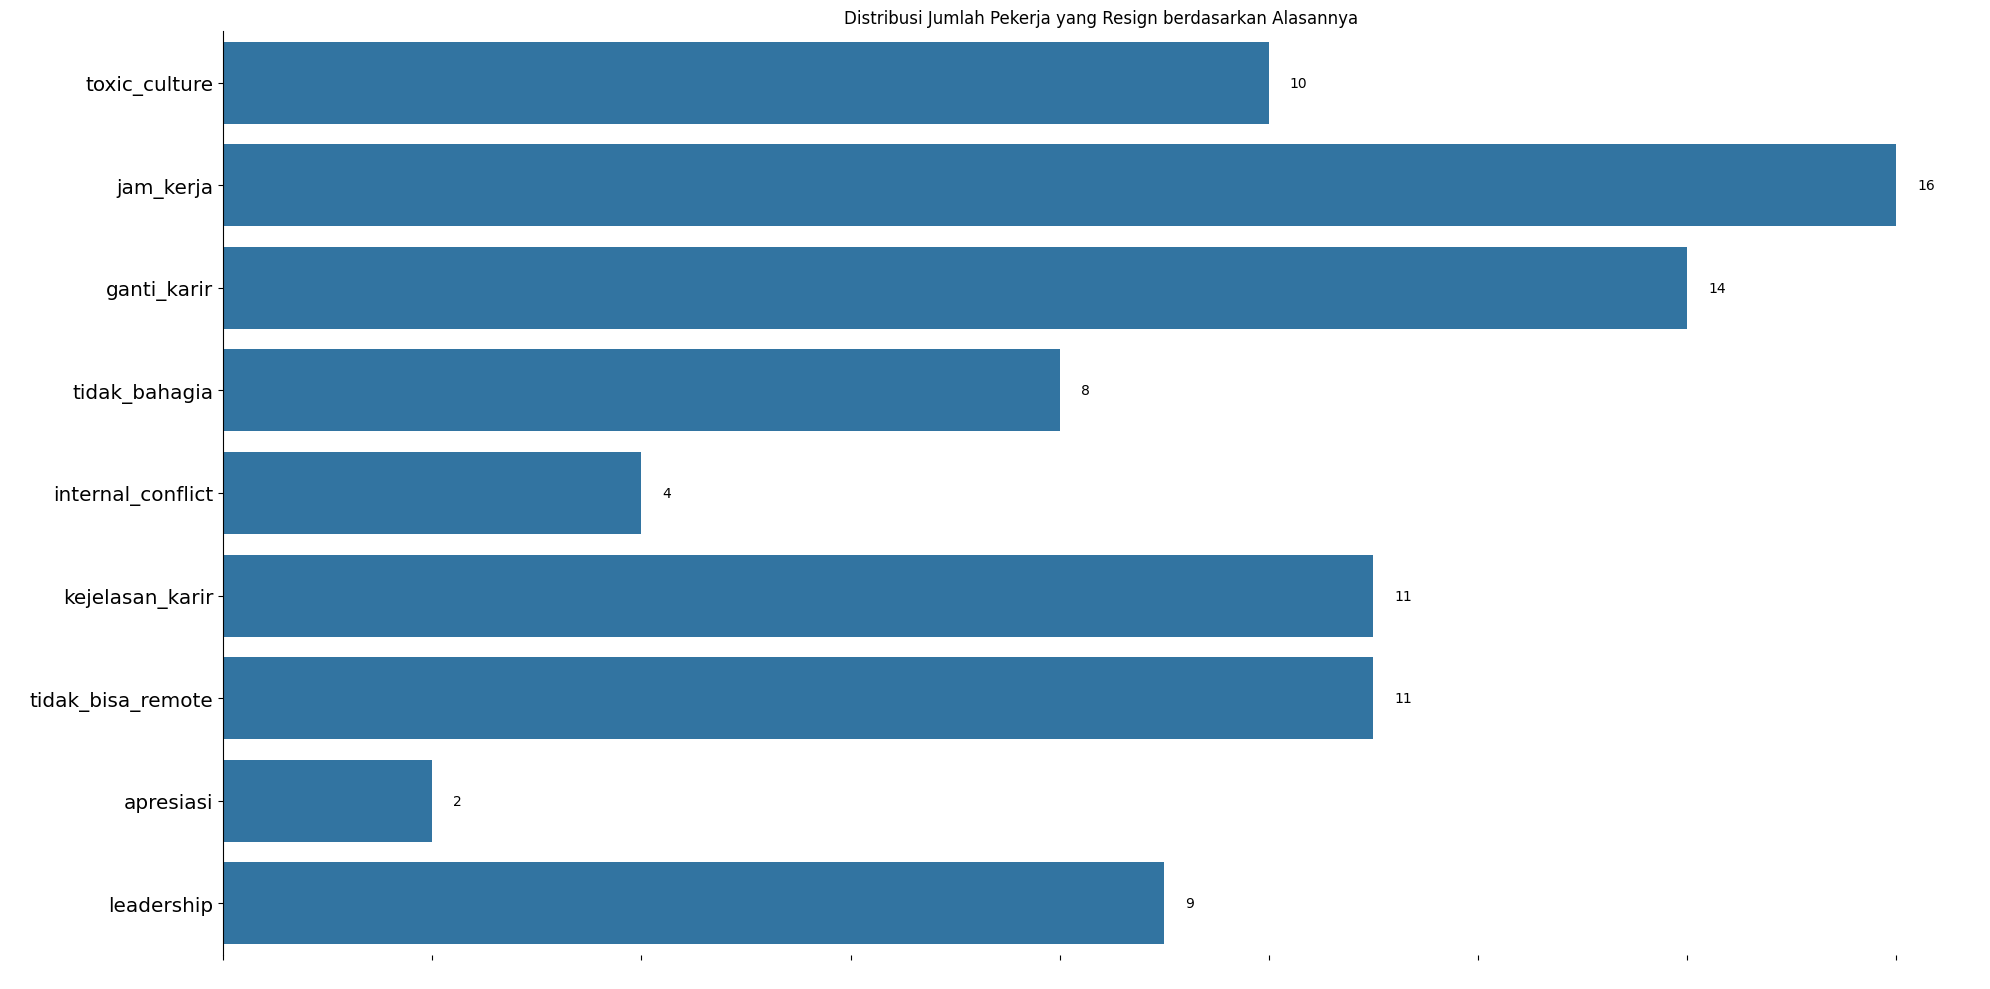

In [ ]:
sns.countplot(y='AlasanResign', data=df_resigned)

plt.title('Distribusi Jumlah Pekerja yang Resign berdasarkan Alasannya')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(visible=False)
sns.despine(bottom=True)

for i, bar in enumerate(plt.gca().patches):
  width = bar.get_width()
  plt.text(width + 0.2, bar.get_y() + bar.get_height() / 2, int(width), va='center')

plt.tight_layout()
plt.show()

In [ ]:
pekerjaan_resign = complete_df.groupby('Pekerjaan', as_index=False)['StatusResign'].value_counts(normalize=True)
pekerjaan_stay = pekerjaan_resign[pekerjaan_resign['StatusResign'] == 0]
pekerjaan_resign = pekerjaan_resign[(pekerjaan_resign['StatusResign'] == 1) & (pekerjaan_resign['proportion'] != 1)]
pekerjaan_resign

,Pekerjaan,StatusResign,proportion
1,Data Analyst,1,0.500000
3,Data Engineer,1,0.300000
8,Product Design (UI & UX),1,0.375000
11,Product Manager,1,0.352941
15,Software Engineer (Android),1,0.291667
17,Software Engineer (Back End),1,0.256881
19,Software Engineer (Front End),1,0.388889


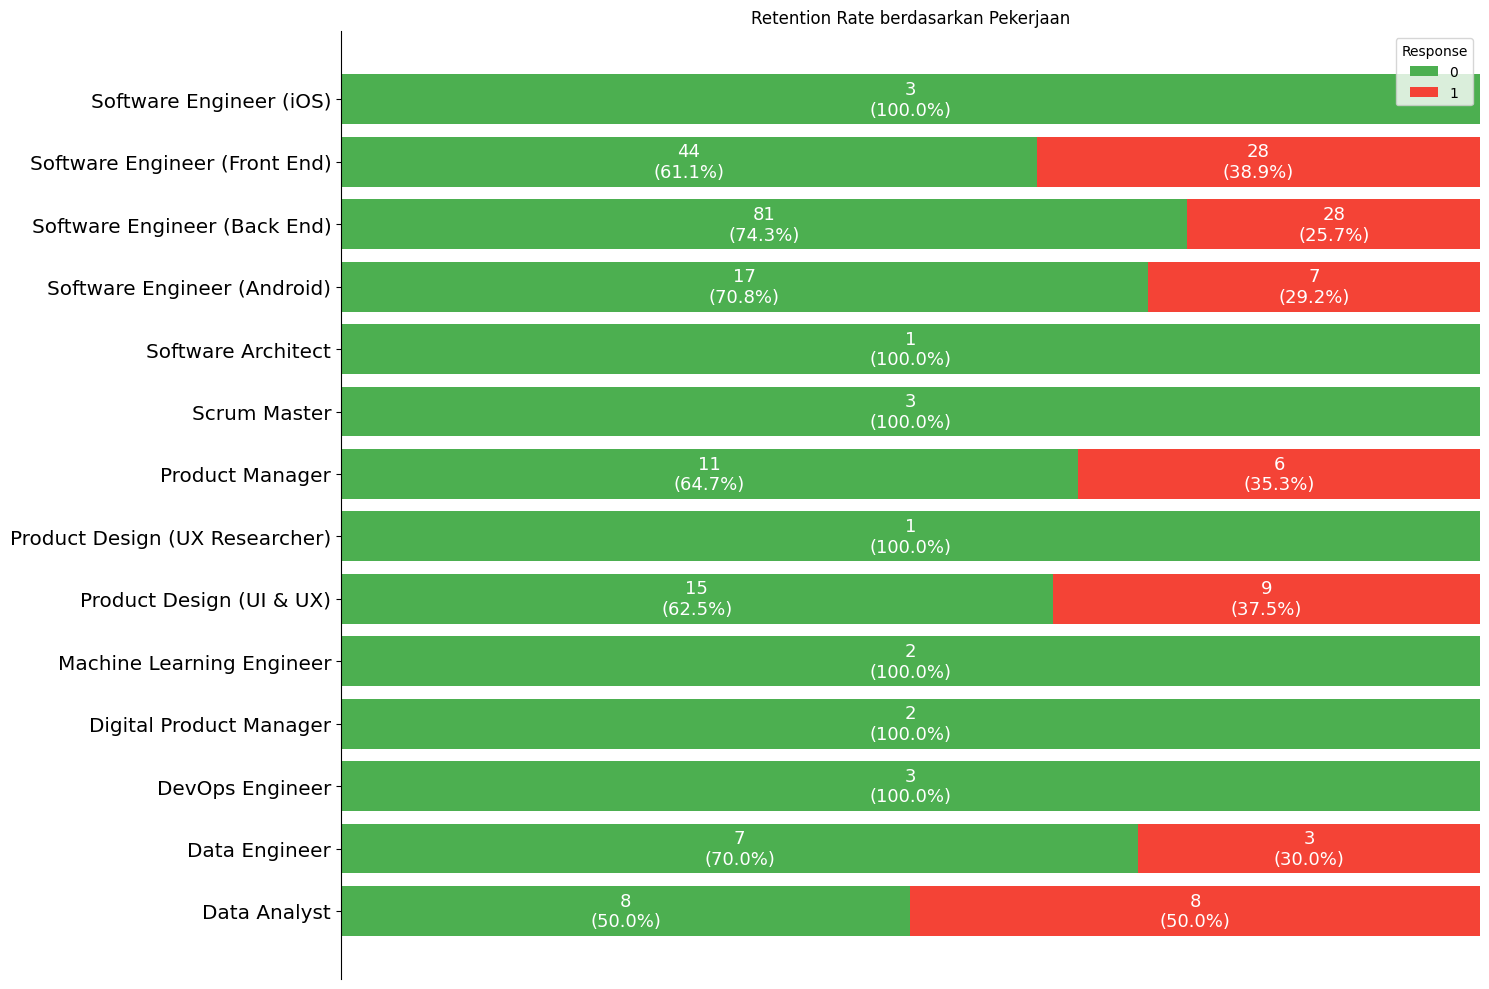

In [ ]:
# countplot
# sns.countplot(data=df, x='AgeGroup', hue='Response')
ct = pd.crosstab(complete_df['Pekerjaan'], complete_df['StatusResign'])
ct_perc = ct.div(ct.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(15,10))
lefts = [0] * len(ct)
colors = ['#4CAF50', '#F44336']

for i, col in enumerate(ct.columns):
	bars = ax.barh(ct.index, ct_perc[col], left=lefts, color=colors[i], label=col)
	for j, (v, c, left) in enumerate(zip(ct_perc[col], ct[col], lefts)):
		if v > 0:
			ax.text(left + v/2, j, f'{c}\n({v:.1f}%)', ha='center', va='center', color='white', fontsize=13)
	lefts = [lefts[k] + ct_perc[col][k] for k in range(len(lefts))]

ax.set_title('Retention Rate berdasarkan Pekerjaan')
ax.legend(title='Response', loc='upper right')
plt.xticks(visible=False)
plt.xlabel('')
# no spine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks([])
ax.xaxis.set_ticklabels([])
plt.tight_layout()
plt.show()

In [ ]:
pekerjaan_alasan_resign = list(pekerjaan_resign['Pekerjaan'].unique())

In [ ]:
pekerjaan_alasan_resign

['Data Analyst',
 'Data Engineer',
 'Product Design (UI & UX)',
 'Product Manager',
 'Software Engineer (Android)',
 'Software Engineer (Back End)',
 'Software Engineer (Front End)']

In [ ]:
resign_alasan = ['Username', 'AlasanResign', 'Pekerjaan']

In [ ]:
df_resign_alasan = df_resigned[df_resigned['Pekerjaan'].isin(pekerjaan_alasan_resign)][resign_alasan]
df_resign_alasan

,Username,AlasanResign,Pekerjaan
1,jealousGelding2,toxic_culture,Data Analyst
2,pluckyMuesli3,jam_kerja,Software Engineer (Front End)
4,shyTermite7,ganti_karir,Product Manager
10,puzzledCake4,ganti_karir,Software Engineer (Front End)
11,grizzledSnipe7,tidak_bahagia,Software Engineer (Back End)
...,...,...,...
275,spiritedWeaver4,jam_kerja,Product Manager
276,pluckyMacaw2,kejelasan_karir,Software Engineer (Back End)
283,yearningPorpoise4,jam_kerja,Product Design (UI & UX)
284,murkySausage9,ganti_karir,Software Engineer (Front End)


In [ ]:
# sunburst chart
import plotly.express as px

fig = px.sunburst(df_resign_alasan, path=['Pekerjaan', 'AlasanResign'])
fig.show()

In [ ]:
complete_df['Pekerjaan'].unique()

array(['Software Engineer (Back End)', 'Data Analyst',
       'Software Engineer (Front End)', 'Product Manager',
       'Software Engineer (Android)', 'Scrum Master',
       'Product Design (UX Researcher)', 'Product Design (UI & UX)',
       'Digital Product Manager', 'Data Engineer',
       'Software Engineer (iOS)', 'DevOps Engineer', 'Software Architect',
       'Machine Learning Engineer'], dtype=object)

In [ ]:
pekerjaan = ['Software Engineer (Back End)', 'Data Analyst', 'Software Engineer (Front End)']

In [ ]:
df_3_pekerjaan = complete_df[(complete_df['Pekerjaan'].isin(pekerjaan)) & (complete_df['StatusResign'] == 1)]

In [ ]:
df_3_pekerjaan['SkorKepuasanPegawai'].describe()

,SkorKepuasanPegawai
count,64.00000
mean,3.87500
std,0.95119
min,1.00000
25%,3.00000
50%,4.00000
75%,5.00000
max,5.00000


In [ ]:
df_3_pekerjaan.columns

Index(['Username', 'EnterpriseID', 'StatusPernikahan', 'JenisKelamin',
       'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai',
       'AsalDaerah', 'HiringPlatform', 'SkorSurveyEngagement',
       'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek',
       'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'NomorHP',
       'Email', 'TingkatPendidikan', 'PernahBekerja', 'IkutProgramLOP',
       'AlasanResign', 'TanggalLahir', 'TanggalHiring',
       'TanggalPenilaianKaryawan', 'TanggalResign', 'StatusResign', 'Usia',
       'LamaBekerja', 'DomainEmail'],
      dtype='object')

In [ ]:
df_3_pekerjaan.groupby('Pekerjaan')['SkorKepuasanPegawai'].mean()

,SkorKepuasanPegawai
Pekerjaan,
Data Analyst,3.750000
Software Engineer (Back End),3.928571
Software Engineer (Front End),3.857143


# Data Reduce

In [ ]:
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,StatusResign,Usia,LamaBekerja,DomainEmail
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,0,48,NaN,yahoo.com
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,1,36,1622.0,yahoo.com
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,1,46,1353.0,icloud.com
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,0,41,NaN,hotmail.com
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2018-09-06,1,46,1760.0,gmail.com


In [ ]:
to_drop = list(set(identifier_cols + constant_cols + date_cols + high_miss_rate + target_linkage + ambigous_cols + unrelated_cols))
to_drop.append('DomainEmail')

In [ ]:
to_drop

['TanggalResign',
 'Username',
 'IkutProgramLOP',
 'AsalDaerah',
 'TanggalLahir',
 'HiringPlatform',
 'PernahBekerja',
 'TanggalHiring',
 'EnterpriseID',
 'AlasanResign',
 'LamaBekerja',
 'NomorHP',
 'StatusPernikahan',
 'Email',
 'TanggalPenilaianKaryawan',
 'DomainEmail',
 'DomainEmail']

In [ ]:
df = df[df['Pekerjaan'].isin(pekerjaan_alasan_resign)]

In [ ]:
sorted(list(df['Pekerjaan'].unique())) == sorted(pekerjaan_alasan_resign)

True

In [ ]:
df.drop(columns=to_drop, inplace=True)
reduced_data = df.copy()

In [ ]:
reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 0 to 286
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   JenisKelamin                        272 non-null    object 
 1   StatusKepegawaian                   272 non-null    object 
 2   Pekerjaan                           272 non-null    object 
 3   JenjangKarir                        272 non-null    object 
 4   PerformancePegawai                  272 non-null    object 
 5   SkorSurveyEngagement                272 non-null    int64  
 6   SkorKepuasanPegawai                 267 non-null    float64
 7   JumlahKeikutsertaanProjek           270 non-null    float64
 8   JumlahKeterlambatanSebulanTerakhir  271 non-null    float64
 9   JumlahKetidakhadiran                267 non-null    float64
 10  TingkatPendidikan                   272 non-null    object 
 11  StatusResign                        272 non-null  

In [ ]:
df

,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,StatusResign,Usia
0,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,4,4.0,0.0,0.0,9.0,Magister,0,48
1,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,4,4.0,4.0,0.0,3.0,Sarjana,1,36
2,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,4,3.0,0.0,0.0,11.0,Magister,1,46
3,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,3,3.0,0.0,4.0,6.0,Sarjana,0,41
4,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,3,3.0,0.0,0.0,11.0,Sarjana,1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,Wanita,FullTime,Data Engineer,Mid_level,Bagus,2,5.0,0.0,0.0,16.0,Sarjana,0,47
283,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,4,5.0,0.0,0.0,11.0,Sarjana,1,46
284,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,2,5.0,0.0,0.0,17.0,Sarjana,1,51
285,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,4,5.0,0.0,0.0,20.0,Sarjana,1,39


In [ ]:
reduced_data.to_excel('reduced_data.xlsx', index=False)

## Advanced Features Grouping

In [ ]:
final_num_cols = []

for col in numerical_cols:
  if col in df.columns:
    final_num_cols.append(col)

final_discrete_num_cols = []
final_continuous_num_cols = []

for col in df.columns:
  if col in discrete_num_cols:
    final_discrete_num_cols.append(col)
  elif col in continuous_num_cols:
    final_continuous_num_cols.append(col)

In [ ]:
print(final_num_cols)
print(final_discrete_num_cols)
print(final_continuous_num_cols)

['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'Usia']
['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek']
['JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'Usia']


In [ ]:
final_cat_cols = []

for col in categorical_cols:
  if col in df.columns:
    final_cat_cols.append(col)

print(final_cat_cols)

['JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'TingkatPendidikan']


In [ ]:
ordinal_cat_cols = []
nominal_cat_cols = ['Pekerjaan']

for col in final_cat_cols:
  if col not in nominal_cat_cols:
    ordinal_cat_cols.append(col)

print(nominal_cat_cols)
print(ordinal_cat_cols)

['Pekerjaan']
['JenisKelamin', 'StatusKepegawaian', 'JenjangKarir', 'PerformancePegawai', 'TingkatPendidikan']


# Data Splitting

In [ ]:
x = df.drop(columns=['StatusResign'])
y = df['StatusResign']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
y_train.value_counts()

,count
StatusResign,
0,144
1,73


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(217, 12)
(55, 12)
(217,)
(55,)


# Data Preprocessing

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 35 to 107
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   JenisKelamin                        217 non-null    object 
 1   StatusKepegawaian                   217 non-null    object 
 2   Pekerjaan                           217 non-null    object 
 3   JenjangKarir                        217 non-null    object 
 4   PerformancePegawai                  217 non-null    object 
 5   SkorSurveyEngagement                217 non-null    int64  
 6   SkorKepuasanPegawai                 213 non-null    float64
 7   JumlahKeikutsertaanProjek           216 non-null    float64
 8   JumlahKeterlambatanSebulanTerakhir  216 non-null    float64
 9   JumlahKetidakhadiran                213 non-null    float64
 10  TingkatPendidikan                   217 non-null    object 
 11  Usia                                217 non-null 

## Missing Values: Imputation

In [ ]:
# import imputer
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
x_train[final_num_cols] = num_imputer.fit_transform(x_train[final_num_cols])
x_train[final_cat_cols] = cat_imputer.fit_transform(x_train[final_cat_cols])

x_test[final_num_cols] = num_imputer.transform(x_test[final_num_cols])
x_test[final_cat_cols] = cat_imputer.transform(x_test[final_cat_cols])

## Duplicates

In [ ]:
x_train.duplicated().sum()

np.int64(0)

## Outliers

In [ ]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson')

final_num_cols.remove('SkorKepuasanPegawai')

x_train[final_num_cols] = transformer.fit_transform(x_train[final_num_cols])
x_test[final_num_cols] = transformer.transform(x_test[final_num_cols])

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x_train['SkorKepuasanPegawai'] = scaler.fit_transform(x_train[['SkorKepuasanPegawai']])
x_test['SkorKepuasanPegawai'] = scaler.transform(x_test[['SkorKepuasanPegawai']])

## Data Encode

### Ordinal Encode

In [ ]:
ordinal_cat_cols

['JenisKelamin',
 'StatusKepegawaian',
 'JenjangKarir',
 'PerformancePegawai',
 'TingkatPendidikan']

In [ ]:
df['PerformancePegawai'].unique()

array(['Sangat_bagus', 'Sangat_kurang', 'Bagus', 'Biasa', 'Kurang'],
      dtype=object)

In [ ]:
# ordinal encode
statuskepegawaian = {'Internship': 0, 'Outsource': 1, 'FullTime': 2}
jenjangkarir = {'Freshgraduate_program': 0, 'Mid_level': 1, 'Senior_level': 2}
performancepegawai = {'Sangat_kurang': 0, 'Kurang': 1, 'Biasa': 2, 'Bagus': 3, 'Sangat_bagus': 4}
tingkatpendidikan = {'Sarjana': 0, 'Magister': 1, 'Doktor': 2}

In [ ]:
x_train['StatusKepegawaian'] = x_train['StatusKepegawaian'].map(statuskepegawaian)
x_train['JenjangKarir'] = x_train['JenjangKarir'].map(jenjangkarir)
x_train['PerformancePegawai'] = x_train['PerformancePegawai'].map(performancepegawai)
x_train['TingkatPendidikan'] = x_train['TingkatPendidikan'].map(tingkatpendidikan)

x_test['StatusKepegawaian'] = x_test['StatusKepegawaian'].map(statuskepegawaian)
x_test['JenjangKarir'] = x_test['JenjangKarir'].map(jenjangkarir)
x_test['PerformancePegawai'] = x_test['PerformancePegawai'].map(performancepegawai)
x_test['TingkatPendidikan'] = x_test['TingkatPendidikan'].map(tingkatpendidikan)

### Binary Encode

In [ ]:
jeniskelamin = {'Wanita': 0, 'Pria': 1}

In [ ]:
x_train['JenisKelamin'] = x_train['JenisKelamin'].map(jeniskelamin)
x_test['JenisKelamin'] = x_test['JenisKelamin'].map(jeniskelamin)

### Nominal Encode: One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ohe_pipeline = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), nominal_cat_cols)
], remainder='passthrough')

In [ ]:
x_train_ohe = ohe_pipeline.fit_transform(x_train)
x_test_ohe = ohe_pipeline.transform(x_test)

In [ ]:
feature_names = ohe_pipeline.get_feature_names_out()

clean_feature_names = [name.replace('onehot__', '').replace('remainder__', '') for name in feature_names]

x_train = pd.DataFrame(x_train_ohe.toarray() if hasattr(x_train_ohe, 'toarray') else x_train_ohe,
                       columns=clean_feature_names,
                       index=x_train.index)

x_test = pd.DataFrame(x_test_ohe.toarray() if hasattr(x_test_ohe, 'toarray') else x_test_ohe,
                      columns=clean_feature_names,
                      index=x_test.index)

## Class Imbalance

In [ ]:
y_train.value_counts()

,count
StatusResign,
0,144
1,73


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [ ]:
y_train.value_counts()

,count
StatusResign,
0,144
1,144


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Pekerjaan_Data Analyst                   288 non-null    float64
 1   Pekerjaan_Data Engineer                  288 non-null    float64
 2   Pekerjaan_Product Design (UI & UX)       288 non-null    float64
 3   Pekerjaan_Product Manager                288 non-null    float64
 4   Pekerjaan_Software Engineer (Android)    288 non-null    float64
 5   Pekerjaan_Software Engineer (Back End)   288 non-null    float64
 6   Pekerjaan_Software Engineer (Front End)  288 non-null    float64
 7   JenisKelamin                             288 non-null    float64
 8   StatusKepegawaian                        288 non-null    float64
 9   JenjangKarir                             288 non-null    float64
 10  PerformancePegawai                       288 non-n

## Final Data

In [ ]:
final_x_train = x_train.copy()
final_x_test = x_test.copy()

In [ ]:
x_train.to_excel('x_train.xlsx', index=False)
x_test.to_excel('x_test.xlsx', index=False)
y_train.to_excel('y_train.xlsx', index=False)
y_test.to_excel('y_test.xlsx', index=False)

In [ ]:
final_x_train.head()

,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Manager,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),JenisKelamin,StatusKepegawaian,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,Usia
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2.0,-0.314848,-0.5,-0.525548,-0.335887,1.280597,1.0,-0.846418
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,1.138351,0.5,-0.525548,-0.335887,0.973966,1.0,-0.343961
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,-2.177268,-1.0,1.480282,2.979420,1.280597,0.0,1.230961
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,4.0,1.138351,-0.5,1.912771,-0.335887,0.973966,0.0,0.916796
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.314848,0.0,-0.525548,-0.335887,0.511791,1.0,0.201130


In [ ]:
final_x_test.head()

,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Manager,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),JenisKelamin,StatusKepegawaian,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,Usia
32,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,-2.177268,0.5,-0.525548,2.979420,0.751739,1.0,-1.456754
123,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.314848,0.5,-0.525548,-0.335887,-0.752301,1.0,1.301315
83,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,-0.314848,-0.5,1.923013,-0.335887,-0.552153,0.0,0.201130
135,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,-2.177268,0.0,-0.525548,2.976625,0.864853,0.0,-0.501215
206,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,1.138351,0.0,-0.525548,-0.335887,-0.368824,1.0,1.000679


# Model Development & Evaluation

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

models = {
    'logreg': LogisticRegression(random_state=42),
    'dt': DecisionTreeClassifier(random_state=42),
    'knn': KNeighborsClassifier(),
    'nb': GaussianNB(),
    'rf': RandomForestClassifier(random_state=42),
    'gb': GradientBoostingClassifier(random_state=42),
    'ada': AdaBoostClassifier(random_state=42),
    'xgb': XGBClassifier(random_state=42),
    'cat': CatBoostClassifier(verbose=0, random_state=42)
}

In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import numpy as np
import pandas as pd

def evaluate_models(x_train, x_test, y_train, y_test, models, n_iter=20, random_state=42):
    eval_results = []
    best_model_pipeline = None
    best_f1_global = -1
    all_trained_models = {}

    # Hyperparameter search spaces (continuous/discrete)
    param_distributions = {
        'logreg': {
            'classifier__C': uniform(0.001, 100),
            'classifier__penalty': ['l2'],
            'classifier__solver': ['lbfgs']
        },
        'dt': {
            'classifier__max_depth': randint(2, 20),
            'classifier__min_samples_split': randint(2, 10)
        },
        'knn': {
            'classifier__n_neighbors': randint(3, 15),
            'classifier__weights': ['uniform', 'distance']
        },
        'nb': {},  # No tunable params
        'rf': {
            'classifier__n_estimators': randint(50, 200),
            'classifier__max_depth': randint(3, 20),
            'classifier__min_samples_split': randint(2, 10)
        },
        'gb': {
            'classifier__n_estimators': randint(50, 200),
            'classifier__learning_rate': uniform(0.01, 0.3),
            'classifier__max_depth': randint(2, 10)
        },
        'ada': {
            'classifier__n_estimators': randint(50, 200),
            'classifier__learning_rate': uniform(0.01, 0.3)
        },
        'xgb': {
            'classifier__n_estimators': randint(50, 200),
            'classifier__learning_rate': uniform(0.01, 0.3),
            'classifier__max_depth': randint(3, 10),
            'classifier__subsample': uniform(0.6, 0.4),
            'classifier__colsample_bytree': uniform(0.6, 0.4)
        },
        'cat': {
            'classifier__iterations': randint(100, 500),
            'classifier__learning_rate': uniform(0.01, 0.3),
            'classifier__depth': randint(3, 10),
            'classifier__l2_leaf_reg': uniform(1, 10)
        }
    }

    # Loop through models
    for model_name, model in models.items():
        pipe = Pipeline([('classifier', model)])

        # Apply RandomizedSearchCV if hyperparams exist
        if model_name in param_distributions and param_distributions[model_name]:
            search = RandomizedSearchCV(
                pipe,
                param_distributions[model_name],
                n_iter=n_iter,
                scoring='f1',
                cv=5,
                n_jobs=-1,
                random_state=random_state
            )
            search.fit(x_train, y_train)
            classifier = search.best_estimator_
        else:
            pipe.fit(x_train, y_train)
            classifier = pipe

        # Predict probabilities
        if hasattr(classifier.named_steps['classifier'], 'predict_proba'):
            y_proba = classifier.predict_proba(x_test)[:, 1]

            # Threshold tuning
            thresholds = np.arange(0.1, 0.9, 0.01)
            f1_scores = [f1_score(y_test, y_proba > t, zero_division=0) for t in thresholds]
            best_idx = np.argmax(f1_scores)
            best_threshold = thresholds[best_idx]
            best_f1 = f1_scores[best_idx]
            y_pred = (y_proba > best_threshold).astype(int)
        else:
            y_proba = None
            y_pred = classifier.predict(x_test)
            best_threshold = None
            best_f1 = f1_score(y_test, y_pred, zero_division=0)

        # Evaluate
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

        # Save best model pipeline
        if best_f1 > best_f1_global:
            best_f1_global = best_f1
            best_model_pipeline = classifier

        all_trained_models[model_name] = {
            'pipeline': classifier,
            'best_threshold': best_threshold
        }

        eval_results.append({
            'Model': model_name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1 Score': best_f1,
            'ROC AUC': roc,
            'Best Threshold': best_threshold
        })

    # Results DataFrame
    results_df = pd.DataFrame(eval_results)
    results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
    return results_df, best_model_pipeline

In [ ]:
results_df, classifier = evaluate_models(x_train, x_test, y_train, y_test, models)

In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Best Threshold
0,cat,0.563636,0.382353,0.8125,0.520000,0.592949,0.12
1,knn,0.527273,0.368421,0.8750,0.518519,0.612179,0.33
2,rf,0.509091,0.358974,0.8750,0.509091,0.548878,0.27
3,xgb,0.709091,0.500000,0.5000,0.500000,0.600962,0.40
4,logreg,0.418182,0.326087,0.9375,0.483871,0.491987,0.28
5,ada,0.363636,0.313725,1.0000,0.477612,0.487981,0.26
6,nb,0.490909,0.323529,0.6875,0.440000,0.520833,0.29
7,gb,0.618182,0.368421,0.4375,0.400000,0.562500,0.31
8,dt,0.618182,0.333333,0.3125,0.322581,0.475160,0.67


In [ ]:
classifier

Pipeline(steps=[('classifier',
                 <catboost.core.CatBoostClassifier object at 0x7ae957641f10>)])

## XGB (Used Model)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from scipy.stats import uniform, randint
import numpy as np

# Get the XGBoost model from the original models dict
xgb_base = models['xgb']

# Define hyperparameter search space (same as in evaluate_models)
xgb_param_distributions = {
    'classifier__n_estimators': randint(50, 200),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__max_depth': randint(3, 10),
    'classifier__subsample': uniform(0.6, 0.4),
    'classifier__colsample_bytree': uniform(0.6, 0.4)
}

# Create pipeline
xgb_pipe = Pipeline([('classifier', xgb_base)])

# Randomized search
xgb_search = RandomizedSearchCV(
    xgb_pipe,
    param_distributions=xgb_param_distributions,
    n_iter=20,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
xgb_search.fit(x_train, y_train)

# Best pipeline after tuning
xgb_classifier = xgb_search.best_estimator_

# Predict probabilities
y_probs = xgb_classifier.predict_proba(x_test)[:, 1]

# Tune threshold based on F1
thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = [f1_score(y_test, y_probs > t, zero_division=0) for t in thresholds]
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
y_preds = (y_probs > best_threshold).astype(int)

# Extract tuned classifier and params
xgb_model = xgb_classifier.named_steps['classifier']
xgb_best_params = xgb_model.get_params()

# Output results
print("✅ Best threshold:", best_threshold)
# print("✅ Best hyperparameters:")
# for k, v in xgb_best_params.items():
#     print(f"  {k}: {v}")


✅ Best threshold: 0.3999999999999998


# Model Explainability

In [ ]:
# Feature Importance
importances = classifier.named_steps['classifier'].feature_importances_
feature_names = x_train.columns

# Feature Importance into dataframe
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Extract base feature name
feat_df['BaseFeature'] = feat_df['Feature'].str.extract(r'^([^_]+)')
grouped_feat = feat_df.groupby('BaseFeature')['Importance'].sum().sort_values(ascending=False)

# Sort by its importances' value
print(grouped_feat)

BaseFeature
Pekerjaan                             13.345038
Usia                                  12.835117
PerformancePegawai                    10.840483
JumlahKetidakhadiran                  10.379189
JenjangKarir                           9.556850
TingkatPendidikan                      9.427274
JenisKelamin                           8.485232
SkorSurveyEngagement                   8.424552
SkorKepuasanPegawai                    8.286796
StatusKepegawaian                      5.496663
JumlahKeikutsertaanProjek              2.742607
JumlahKeterlambatanSebulanTerakhir     0.180198
Name: Importance, dtype: float64


# Model Impact Analysis

## CatBoost

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77        39
           1       0.38      0.31      0.34        16

    accuracy                           0.65        55
   macro avg       0.56      0.55      0.56        55
weighted avg       0.64      0.65      0.64        55



In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,31,8
Actual Positive,11,5


## XGB

In [ ]:
y_pred = xgb_classifier.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80        39
           1       0.45      0.31      0.37        16

    accuracy                           0.69        55
   macro avg       0.60      0.58      0.58        55
weighted avg       0.66      0.69      0.67        55



In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,33,6
Actual Positive,11,5


# Model Export

In [ ]:
# model export
import joblib

joblib.dump(classifier, 'best_f1_classifier_model.pkl')
joblib.dump(xgb_classifier, 'xgb_classifier.pkl')

['xgb_classifier.pkl']